# **Proyecto Final NLP - Notebook 2**

# Análisis básico

En esta notebook se hace un análisis muy básico de la data

No tiene que hacer nada más que entenderla

# Importamos librerías y cargamos dataset

In [ ]:
import pandas as pd
from collections import Counter

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
df = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5098,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,266000.0,266000.0,3.575118
5099,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,740.0,740.0,6.130768
5100,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,510.0,510.0,6.292430
5101,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,125000.0,125000.0,3.903090


In [ ]:
# Verificamos Cantidad de moléculas
df['molecule_chembl_id'].unique().shape

(5103,)

In [ ]:
# Rango dinámico del standar value
df['standard_value'].max(), df['standard_value'].min()

(5888436553555884.0, 5e-06)

# Histograma de longitudes de los smiles

In [ ]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

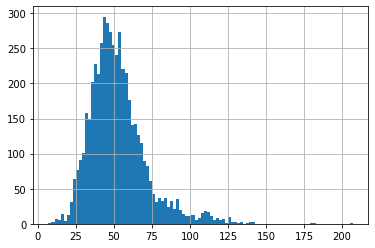

In [ ]:
df['canonical_len'].hist(bins=100)

In [ ]:
# Max y min 
max_sequence_len = df['canonical_len'].max()
max_sequence_len, df['canonical_len'].min()

(207, 7)

In [ ]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [ ]:
# Ejemplo de molécula más larga
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

In [ ]:
# Ejemplo de molécula más corta
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

# Histograma de caracteres
Vamos a contar la fecuencia de aparición de cada caracter la columna canonical_smiles de nuestro dataset.

In [ ]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [ ]:
vocab_hist = dict(Counter(text))

In [ ]:
vocab_hist

{'#': 334,
 '(': 21169,
 ')': 21169,
 '+': 1175,
 '-': 1846,
 '.': 1209,
 '/': 1558,
 '1': 14962,
 '2': 11888,
 '3': 7243,
 '4': 3094,
 '5': 874,
 '6': 224,
 '7': 18,
 '8': 6,
 '=': 7771,
 '@': 4292,
 'B': 566,
 'C': 56810,
 'F': 1025,
 'H': 2317,
 'I': 101,
 'N': 9243,
 'O': 12408,
 'P': 34,
 'S': 536,
 '[': 5569,
 '\\': 338,
 ']': 5569,
 'a': 1,
 'c': 64888,
 'e': 35,
 'i': 2,
 'l': 1448,
 'n': 3981,
 'o': 726,
 'r': 542,
 's': 213}